In [1]:
import pickle
import numpy as np
import pandas as pd
import dtale
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV

In [2]:
dataset=pd.read_csv('diabetes_data_upload.csv')

In [3]:
dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [29]:
x_train[0]

array([27,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [4]:
dataset.shape

(520, 17)

In [5]:
dataset.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [6]:
dataset.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [7]:
m_dataset=pd.get_dummies(dataset,drop_first=True)

In [8]:
m_dataset.head()

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [9]:
m_dataset.columns

Index(['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes',
       'sudden weight loss_Yes', 'weakness_Yes', 'Polyphagia_Yes',
       'Genital thrush_Yes', 'visual blurring_Yes', 'Itching_Yes',
       'Irritability_Yes', 'delayed healing_Yes', 'partial paresis_Yes',
       'muscle stiffness_Yes', 'Alopecia_Yes', 'Obesity_Yes',
       'class_Positive'],
      dtype='object')

In [10]:
diabetes_positive=len(m_dataset[m_dataset['class_Positive']==1])
diabetes_negative=len(m_dataset[m_dataset['class_Positive']==0])
print(("Positive Percentage:{0}".format(int((diabetes_positive/m_dataset['class_Positive'].count())*100))))
print(("Negative Percentage:{0}".format(int((diabetes_negative/m_dataset['class_Positive'].count())*100))))

Positive Percentage:61
Negative Percentage:38


In [11]:
Yes=[]
No=[]
fields=[ 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']
for columns in  fields:
    diabetes_positive=len(dataset[dataset[columns]=='Yes'])
    Yes.append(diabetes_positive)
    diabetes_negative=len(dataset[dataset[columns]=='No'])
    No.append(diabetes_negative)
    print((columns + " Positive Percentage:{0}".format(int((diabetes_positive/dataset[columns].count())*100))))
    print((columns + " Negative Percentage:{0}".format(int((diabetes_negative/dataset[columns].count())*100))))
   

Polyuria Positive Percentage:49
Polyuria Negative Percentage:50
Polydipsia Positive Percentage:44
Polydipsia Negative Percentage:55
sudden weight loss Positive Percentage:41
sudden weight loss Negative Percentage:58
weakness Positive Percentage:58
weakness Negative Percentage:41
Polyphagia Positive Percentage:45
Polyphagia Negative Percentage:54
Genital thrush Positive Percentage:22
Genital thrush Negative Percentage:77
visual blurring Positive Percentage:44
visual blurring Negative Percentage:55
Itching Positive Percentage:48
Itching Negative Percentage:51
Irritability Positive Percentage:24
Irritability Negative Percentage:75
delayed healing Positive Percentage:45
delayed healing Negative Percentage:54
partial paresis Positive Percentage:43
partial paresis Negative Percentage:56
muscle stiffness Positive Percentage:37
muscle stiffness Negative Percentage:62
Alopecia Positive Percentage:34
Alopecia Negative Percentage:65
Obesity Positive Percentage:16
Obesity Negative Percentage:83


In [12]:
print(Yes)
print(No)

[258, 233, 217, 305, 237, 116, 233, 253, 126, 239, 224, 195, 179, 88]
[262, 287, 303, 215, 283, 404, 287, 267, 394, 281, 296, 325, 341, 432]


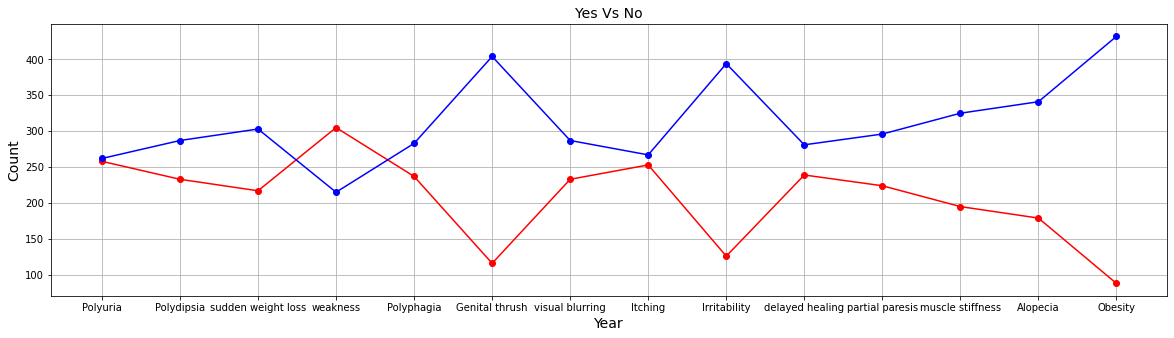

In [13]:
   
Data = {'Yes':Yes,
        'No':No,
        'Symptoms':[ 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']
       }
  
df = pd.DataFrame(Data,columns=['Yes','No','Symptoms'])

plt.figure(figsize=(20,5))  
plt.plot(df['Symptoms'], df['Yes'], color='red', marker='o')
plt.plot(df['Symptoms'], df['No'], color='blue', marker='o')
plt.title('Yes Vs No', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.show()

In [30]:
features_columns=['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes',
       'sudden weight loss_Yes', 'weakness_Yes', 'Polyphagia_Yes',
       'Genital thrush_Yes', 'visual blurring_Yes', 'Itching_Yes',
       'Irritability_Yes', 'delayed healing_Yes', 'partial paresis_Yes',
       'muscle stiffness_Yes', 'Alopecia_Yes', 'Obesity_Yes']
predicted_class=['class_Positive']
x=m_dataset[features_columns].values
y=m_dataset[predicted_class].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [31]:
"LogisticRegression model for prediction"
y_train=y_train.ravel()
model=LogisticRegression(C=1,l1_ratio=0.5,penalty='elasticnet',solver='saga')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

C:\Users\admin\anaconda3\envs\DiabetesRiskPrediction\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [32]:
print(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

0.9326923076923077
[[36  4]
 [ 3 61]]


In [33]:
y_train=y_train.ravel()
from sklearn.linear_model import RidgeClassifier
Ridge_model=RidgeClassifier()
Ridge_model.fit(x_train,y_train)
Ridge_y_pred=model.predict(x_test)

In [34]:
print(accuracy_score(y_test,Ridge_y_pred))
cm = confusion_matrix(y_test, Ridge_y_pred)
print(cm)

0.9326923076923077
[[36  4]
 [ 3 61]]


In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
#rf_predict=rf_classifier(x_test)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [36]:
rf_pred = classifier.predict(x_test)

In [37]:
print(accuracy_score(y_test,rf_pred))
cm = confusion_matrix(y_test, rf_pred)
print(cm)

0.9903846153846154
[[40  0]
 [ 1 63]]


In [38]:
pickle.dump(Ridge_model,open('model.pkl','wb'))

In [39]:
prediction =pickle.load(open('model.pkl','rb'))
print(model.predict([[39,1,1,0,1,0,1,1,1,0,1,1,0,1,1,1]]))


[1]
